# 필기체 숫자 인식을 위한 MNIST 데이터 수집


<img src="files/mnist_digits.png">

MNIST는 기계학습 분야에서 가장 기본적으로 사용되는 데이터로서, 0부터 9까지 숫자를 손으로 쓴 데이터들을 포함하고 있다. 여기서는 MNIST 데이터 파일을 다운로드 하고, 프로그램에 로드하고, 데이터 내용을 확인하는 절차를 소개하겠다.

이 과정에서, 바이너리(binary) 데이터 파일이 어떻게 구성되어 있는지를 살펴볼 것이다. 실제로 대부분의 센서 데이터들이 이와 같이 바이너리 데이터로 생성되어 있다. 바이너리 데이터로 구성되어 있는 원시 데이터로부터 그 내용 (여기서는 숫자)를 판독하는 과정을 소개할 것이다. 

이 데이터는 사람들에게 종이 위에 검정색 잉크로 0부터 9까지의 숫자를 쓰도록 하여 만든 데이터이다. 손글씨 이미지를 스캔하여 기계학습 알고리즘 테스트에 사용하고 있다.

실험에는 2가지 데이터 세트를 사용하는데, SD-1 데이터세트는 고등학생들이 쓴 글자를 기초로 하여 조금 알아보기가 어렵고, DS-3 데이터 세트는 어른들이 작성을 하여, 좀 더 알아보기기 쉽다. SD-3 데이터는 원래는 훈련용 데이터로 사용하고, DS-1 데이터는 테스트용으로 사용하려고 했던 것이다. 그런데 LeCun은 이 2가지 데이타를, 원래의 의도대로 분리해서 사용하지 않고 섞어서 훈련용과 테스트 용으로 사용하였다. 

한가지 언급할 것은, 여기서 소개하는 MNIST 데이터는 이미 많은 수정과정을 거친 바이너리 데이터라는 것이다. 처음에 손으로 쓴 데이타는, 이보다 훨씬 잡음(noise)이 많이 섞여 있어 알아보기 어려운 형태이다.


이 이미지 데이터는 모두 20x20 픽셀 크기로 일정하게 정규화 되어 있어 다루기가 편리하게 되어 있다. LeCun의 웹사이트에서 이 데이터를 가져올 것이다. 이 예제에서 사용할 데이터는 사실 많은 과정을 거쳐서 분석하기 편리하게 변환되어 있다는 것을 알아야 한다. 실제로 원시 데이터로부터 분석에 사용할만한 데이터를 얻으려면 많은 노력을 하여 데이타를 전처리(preprocess) 해야 한다.

예를 들어 원래 이미지 데이터는 흑과 백의 두가지 상태만을 나타내는 (0 과 1) 픽셀로 구성되어 있었는데, 이를 (0 ~ 255) 사이의 값을 갖는 그레이 스케일로 바꾸었다. 또한 [center of mass](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.measurements.center_of_mass.html) 방식을 사용하여 이미지의 무게 중심 (center of mass)이 픽셀 이미지 데이터의 중심 위치에 오도록 조정하였다. 이렇게 정리된 파일이 LeCun의 웹사이트에서 제공되는 이미지 파일이다. 

이와같이 NIST의 기관이 사람들을 고용하여 손글씨를 쓰게 하고, 이를 정리하고, 또한 LeCun같은 사람이 이를 분석하기 편리하게 이미지를 조정하는 등의 작업을 거쳐서 비로소 이미지분석에 사용할만한 데이터가 만들어졌다는 것을 기억해야 한다. 데이터 분석에서 가장 어렵고 시간이 오래 걸리는 영역이 바로 분석에 사용할 수 있는 형태의 데이터를 확보하는 일이다.

###### 데이터 소스

MNIST 데이터는 [Yann LeCun](http://yann.lecun.com/)교수의 웹사트에서 가져올 수 있다. http://yann.lecun.com/exdb/mnist/ 

아래의 4개의 파일을 가져와야 한다:

- http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
- http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
- http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
- http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

###### 1단계 : 데이터 저장소 확인
먼저 데이터를 저장할 곳을 확인해야 한다

In [1]:
# 아래에서 '.'는 현재 작업 디렉토리를 가리킨다 (즉, 현재 프로그램이 저장되어 있는곳을 말한다)
# 아래는 고정된 이름의 디렉토리를 정의하는데 이와 같이 상수화된 변수는 프로그램의 첫부분에서 정의하는 것이 일반적이다

path_to_directory = "./data"
path_to_data = "./data/mnist"

# 아래에서 os 는 운영체제와 통신하기 위해 사용하는 라이브러리이다
# 이 라이브러리를 사용하면 운영 체제에게 임의의 명령문을 내릴 수 있다

import os  

if not os.path.isdir(path_to_directory): # 데이터를 저장할 디렉토리가 있는지 확인하고 없으면 생성한다
    os.mkdir(path_to_directory)

# shutil은 파일과 디렉터리를 다루는 유틸리티이다
# 여기서는 'mnist' 디렉토리가 존재하는지 확인하고 그 내용을 비우는 작업을 한다
# 이렇게 하는 목적은 새로운 데이터셋을 안전하게 사용하기 위해서이다

import shutil
    
if os.path.isdir(path_to_data):
    shutil.rmtree(path_to_data) # 디렉토리와 그 내용을 모두 지운다

os.mkdir(path_to_data)

###### 2단계: 데이터 다운로드
4개의 데이터를 다운로드하고 압축을 푼다

In [5]:
# requests 는 URL을 다루기 위해서 사용한다
# gzip 는 압축을 풀기 위해서 사용한다

import requests
import gzip

# 여기서는 다운로드한 파일을 직접 하나씩 입력하였다
# 특정 웹사이트에서 다운로드할 파일이 많을 경우에는 Requests and BeautifulSoup4 같은 라이브러리를 사용한다

urls = ["http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", 
        "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", 
        "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", 
        "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"] 

for url in urls:
    print("Downloading {}...".format(url))
    compressed_name = url.split("/")[-1] # /로 구분된 마지막 스트링을 얻는다 (e.g. "train-images-idx3-ubyte.gz")
    decompressed_name = compressed_name.split(".")[0] # '.' 앞부분을 얻는다 "train-images-idx3-ubyte"
    
    # os.path.join을 사용하여 path 를 join 한다
    compressed_path = os.path.join(path_to_data, compressed_name)
    decompressed_path = os.path.join(path_to_data, decompressed_name)
    
    # stream = True 는 메모리에 로드하는 대신 스트림을 선택하는 것을 나타낸다
    # shutil.copyfileobj를 사용하려면 필요하다

    response = requests.get(url, stream = True) 
    if response.status_code != 200: # HTTP response code 200은 "OK"를 의미한다
        # 응답이 "OK"가 아니면 오류를 알리면서 프로그램을 종료한다
        raise ValueError("Requests returned a non-200 HTTP status code (status: {}) when downloading {}.".format(r.status_code, url))
    
    # with open() as f를 사용하면 작업 종료시 파이를 닫는다
    with open(compressed_path, 'wb') as compressed_file: # 'wb' 는 bytes 로 쓰는 것을 의미한다: (w)rite (b)ytes.
        shutil.copyfileobj(response.raw, compressed_file)  # HTTP response 내용을 있는 그대로(raw) 출력 파일에 쓴다
    
    # 압축을 풀고 원본 파일을 지운다
    with gzip.open(compressed_path, 'rb') as compressed_file:
        with open(decompressed_path, 'wb') as decompressed_file:
            data = compressed_file.read()
            decompressed_file.write(data)
            
    os.remove(compressed_path)
    
    print("Downloaded {}".format(url))

print("Finished downloading!")

Downloaded http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Downloaded http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Downloaded http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Downloaded http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Finished downloading!


###### 3단계: 데이터를 로드한다
네개의 파일을 다운로드하고 압축을 풀었다. 그런데 이 다운로드 받은 데이터는 IDX 형식으로 되어 있어 분석하기가 번거롭다. 이제 이 데이터를 파이썬에서 다루기 편리한 numpy array 형식으로 바꾸겠다. 

(참고로 IDX 파일 형식은 이미지 벡터를 그대로 표현한 형식인데 이에 대해서는 다음 사이트의 맨 아래 부분에 잘 설명되어 있다
[the MNIST website](http://yann.lecun.com/exdb/mnist/))

***
IDX 파일 포맷은 벡터와 다차원 매트릭스를 표현하는 데이터 포맷으로 기본 형식은 아래와 같다.

*magic number, size in dimension 0, size in dimension 1, size in dimension 2, ..., size in dimension N, data*

magic number 는 정수이고(MSB) 처음 두 바이트는 항상 0 이다.
세번째 바이트 코드는 데이터의 타입을 다음과 같이 구분한다

0x08: unsigned byte 
0x09: signed byte 
0x0B: short (2 bytes) 
0x0C: int (4 bytes) 
0x0D: float (4 bytes) 
0x0E: double (8 bytes)

네번째 바이트 코드는 벡터나 매트릭스의 차원을 나타낸다. 1이면 벡터를 2면 매트릭스를 나타낸다
각 dimension의 크기는 4 바이트 정수로 나타낸다 (MSB first, high endian)
각 데이터는 C언어의 어레이처럼 저장된다 
***

파일에는 images 와 labels 두가지가 있으며 헤더는 다음과 같이 4 바이트 정수로 표현된다 [Most Significant Bit first](https://en.wikipedia.org/wiki/Most_significant_bit#Most_Significant_Bit_First_vs_Least_Significant_Bit_First)

바이너리 형식으로, 이미지(image) 파일의 magic number는 다음과 같다 00000000 00000000 00001000 00000011. 처음의 두 바이트는 0 이고 세번째 바이트는 00001000 이다. 이는 08 을 hexadecimal로 표현한 것으로 이 데이터가 unsigned bytes임을 나타낸다. 네번째 바이트는 00000011 이며 이는 숫자 3을 나타내고 데이터가 3 차원 데이터임을 나타낸다. 즉, 샘플의 수, 행과 열의 수 등 3개로 구성되며, 4 바이트의 magic number는 2051 이 된다.

레이블(label) 파일의 magic number는 00000000 00000000 00001000 00000001 이다. 처음의 두 바이트는 0이고, 세번째 바이트는 unsigned bytes임을 나타낸다. 네번째 바이트는 1인데 이는 1 차원의 데이터가 들어 있음을 나타내며 에제 샘플의 갯수를 나타낸다. magic number는 2049가 된다.

이미지 파일은 4 개의 헤더를 갖는데 magic number, 예제 샘플의 수(dimension 0), 행의 수 (dimension 1), 열의 수(dimension 2)를 갖는다. 레이블 파일은 두개의 헤더를 갖는데, magic number와 예제의 수(dimension 0)를 나타낸다.

위와 같은 기본 정보를 이용해서, 앞에서 다운로드 하고 압축을 해지한 파일이 정확한지를 확인하고 이를 numpy 어레이에 담는 작업을 하겠다.


In [3]:
# numpy는 파이썬의 가장 유명한 라이브러리로서 과학적인 연산을 하는데 사용된다
# 이를 통해 파이썬의 기본적인 기능을 사용하는 대신 성능이 더욱 향상된 기능을 사용하게 된다

import numpy as np

decompressed_training_images_name = "train-images-idx3-ubyte"
decompressed_training_labels_name = "train-labels-idx1-ubyte"
decompressed_testing_images_name = "t10k-images-idx3-ubyte"
decompressed_testing_labels_name = "t10k-labels-idx1-ubyte"

path_to_decompressed_training_images = os.path.join(path_to_data, decompressed_training_images_name)
path_to_decompressed_training_labels = os.path.join(path_to_data, decompressed_training_labels_name)
path_to_decompressed_testing_images = os.path.join(path_to_data, decompressed_testing_images_name)
path_to_decompressed_testing_labels = os.path.join(path_to_data, decompressed_testing_labels_name)

def load_images(path_to_images):
    with open(path_to_images, 'rb') as infile:
        # 4개의 4 바이트 정수를 읽는다 (numpy에서는 이를 '>i4'로 간단히 표현한다)
        magic_number, num_examples, rows, cols = np.fromfile(infile, count=4, dtype='>i4')
        assert(magic_number == 2051) # 파일이 정확하게 압축 해제 되었는지를 확인한다
        assert(num_examples == 60000 or num_examples == 10000) # training 예제는 60k testing 예제는 10k
        assert(rows == 28)
        assert(cols == 28)
        # 각 데이터 값은 0 부터 255 사이의 값을 갖는 unsigned byte 이다
        # numpy에서 unsigned bytes를 나타내는 약어는 uint8 이다
        images = np.fromfile(infile, dtype=np.uint8).reshape(num_examples, rows, cols)
    return images

def load_labels(path_to_labels):
    with open(path_to_labels, 'rb') as infile:
        magic_number, num_examples = np.fromfile(infile, count=2, dtype='>i4')
        assert(magic_number == 2049)
        assert(num_examples == 60000 or num_examples == 10000) # training 예제는 60k testing 예제는 10k
        labels = np.fromfile(infile, dtype=np.uint8)
    return labels

training_images = load_images(path_to_decompressed_training_images)
training_labels = load_labels(path_to_decompressed_training_labels)
testing_images = load_images(path_to_decompressed_testing_images)
testing_labels = load_labels(path_to_decompressed_testing_labels)

###### 4 단계: 데이터 확인

이제 4가지 파일을 다운로드하고 압축파일을 풀었다. 그리고 이미지와 레이블의 내용을 추출했다. 이미지 파일에는 손으로 쓴 숫자 이미지들이 들어있고 (training_images), 레이블 파일에는 이미지에 해당하는 숫자(training_labels)가 들어있다. 이런 내용이 맞는지를 확인하기 위해서 첫 번째 이미지의 내용과 그 이미지에 해당하는 레이블을 출력해 보겠다.

The first image should be of a 5


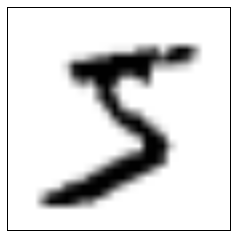

In [4]:
print("The first image should be of a {}".format(training_labels[0]))

# matplotlib 라이브러리는 파이썬에서 그림을 그릴 때 사용된다
import matplotlib.pyplot as plt 

# 아래는 그림을 새로운 윈도 창을 말들면서 그리지 않고, 주피터 노트북에 그리라는 뜻이다
%matplotlib inline

image = training_images[0]

# 이미지를 컬러가 아닌 그레이 스케일(흑백)로 그리고, x와 y축의 tick marks는 삭제하라는 뜻이다

plt.imshow(image, cmap='gray_r')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.show()

이제 데이터를 다운로드하고, 압축을 해지하고, 파일로 저장하고, 첫 번째 이미지를 출력하는 것까지 수행했다. 이제 기계학습을 시킬 준비가 된 것이다.

###### 5 단계 : 코드 재구성(리팩터링)

지금까지 수행한 작업을 더 간결하게 수행하도록 코드를 재작성(refactoring)하겠다. 이 코드에서는 load_mnist() 함수를 다음과 같이 호출한다.

`training_images, training_labels, testing_images, testing_labels = load_mnist()`

In [6]:
import os
from shutil import copyfileobj
from requests import get as rget
from gzip import open as gopen
import numpy as np

path_to_directory = "./data"
path_to_data = os.path.join(path_to_directory, "mnist")

training_images_name = "train-images-idx3-ubyte"
training_labels_name = "train-labels-idx1-ubyte"
testing_images_name  = "t10k-images-idx3-ubyte"
testing_labels_name  = "t10k-labels-idx1-ubyte"

website = "http://yann.lecun.com/exdb/mnist/"
extension = ".gz"

urls = ["http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", 
        "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", 
        "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", 
        "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"]

def name_to_url(name):
    url = website + name + extension
    assert(url in urls)
    return url

def name_to_decompressed_path(name):
    decompressed_path = os.path.join(path_to_data, name)
    return decompressed_path

def name_to_compressed_path(name):
    decompressed_path = name_to_decompressed_path(name)
    compressed_path = decompressed_path + extension
    return compressed_path  

def check_destination():
    if not os.path.isdir(path_to_directory):
        os.mkdir(path_to_directory)
    
    if not os.path.isdir(path_to_data):
        os.mkdir(path_to_data)

def download_mnist(): 
    names = [training_images_name, training_labels_name, testing_images_name, testing_labels_name]
    
    for name in names:
        compressed_path = name_to_compressed_path(name)
        decompressed_path = name_to_decompressed_path(name)
        
        # 필요한 파일만 다운로드한다. 이를 위해 이미 파일이 있는지 먼저 확인한다
        if not os.path.isfile(decompressed_path):
            if not os.path.isfile(compressed_path):
                url = name_to_url(name)
                response = rget(url, stream = True) 
                if response.status_code != 200: # HTTP response code 200 means "OK"
                    # 응답이 "OK"가 아니면 프로그램을 종료한다
                    raise ValueError("Requests returned a non-200 HTTP status code (status: {}) when downloading {}.".format(r.status_code, url))

                # with open() as f automatically closes the file when you're done
                with open(compressed_path, 'wb') as compressed_file: # 'wb' 는 bytes 로 쓰는 것을 의미한다: (w)rite (b)ytes.
                    shutil.copyfileobj(response.raw, compressed_file)  # HTTP response 내용을 있는 그대로(raw) 출력 파일에 쓴다
    
            # 압축을 풀고 원본 파일을 지운다
            with gopen(compressed_path, 'rb') as compressed_file:
                with open(decompressed_path, 'wb') as decompressed_file:
                    data = compressed_file.read()
                    decompressed_file.write(data)
                    
            os.remove(compressed_path)
                      
def load_images(path_to_images):
    with open(path_to_images, 'rb') as infile:
        magic_number, num_examples, rows, cols = np.fromfile(infile, count=4, dtype='>i4')
        assert(magic_number == 2051) # MNIST 웹페이지
        assert(num_examples == 60000 or num_examples == 10000) # training 예제는 60k testing 예제는 10k
        assert(rows == 28 and cols == 28) # 28 x 28 픽셀 이미지
        images = np.fromfile(infile, dtype=np.uint8).reshape(num_examples, rows, cols)
    return images
     
def load_labels(path_to_labels):
    with open(path_to_labels, 'rb') as infile:
        magic_number, num_examples = np.fromfile(infile, count=2, dtype='>i4')
        assert(magic_number == 2049) # MNIST 웹페이지
        assert(num_examples == 60000 or num_examples == 10000) # training 예제는 60k testing 예제는 10k
        labels = np.fromfile(infile, dtype=np.uint8)
    return labels
        
def load_mnist():
    check_destination()
    download_mnist()
    training_images = load_images(name_to_decompressed_path(training_images_name))
    training_labels = load_labels(name_to_decompressed_path(training_labels_name))
    testing_images = load_images(name_to_decompressed_path(testing_images_name))
    testing_labels = load_labels(name_to_decompressed_path(testing_labels_name))    
    
    return training_images, training_labels, testing_images, testing_labels

In [8]:
training_images, training_labels, testing_images, testing_labels = load_mnist()
print(training_images)
print(training_labels)
print(testing_images)
print(testing_labels)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
[5 0 4 ..., 5 6 8]
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
 